# Online News Popularity

### Part 1 - Exploratory Data Analysis, Linear Regression, Logistic Regression, Regularization

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
data = pd.read_csv('On')

In [ ]:
data.shape

In [107]:
# So, In total data set 39644 records and 61 attributes

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [109]:
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
data.describe()
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


## Exploratory Data Analysis

In [110]:
data.apply(lambda x : sum(x.isnull()), axis=0)

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

In [111]:
# No Null values in dataset

In [112]:
data.reset_index(drop=True)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


In [113]:
data[' shares'].median()

1400.0

In [114]:
def converter(x):
    if(x > 1400):
        return 1
    else:
        return 0

In [115]:
data['NumberOfShares'] = data[' shares'].apply(converter)

In [116]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,NumberOfShares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [117]:
# Check for values posted as zero

In [118]:
data[data[' rate_positive_words'] == 0].count()

url                               1217
 timedelta                        1217
 n_tokens_title                   1217
 n_tokens_content                 1217
 n_unique_tokens                  1217
 n_non_stop_words                 1217
 n_non_stop_unique_tokens         1217
 num_hrefs                        1217
 num_self_hrefs                   1217
 num_imgs                         1217
 num_videos                       1217
 average_token_length             1217
 num_keywords                     1217
 data_channel_is_lifestyle        1217
 data_channel_is_entertainment    1217
 data_channel_is_bus              1217
 data_channel_is_socmed           1217
 data_channel_is_tech             1217
 data_channel_is_world            1217
 kw_min_min                       1217
 kw_max_min                       1217
 kw_avg_min                       1217
 kw_min_max                       1217
 kw_max_max                       1217
 kw_avg_max                       1217
 kw_min_avg              

In [119]:
data[' rate_positive_words'] = data[' rate_positive_words'].replace(0, np.NaN)

In [120]:
data[' rate_negative_words'] = data[' rate_negative_words'].replace(0, np.NaN)

In [121]:
data.dropna(inplace=True)

In [122]:
data.shape

(37063, 62)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

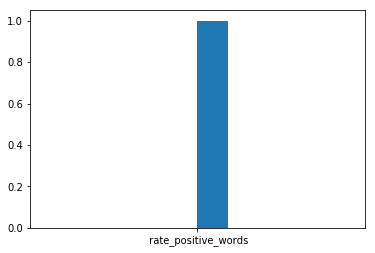

In [123]:
plt.hist(' rate_positive_words')

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

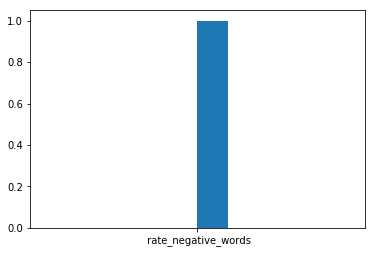

In [124]:
plt.hist(' rate_negative_words')

In [125]:
# Co-relation between dataset

In [126]:
#Univariate Data Analysis 

In [127]:
# Below barplot shows the data shared on weekend

Text(0,0.5,'Number Of Shares')

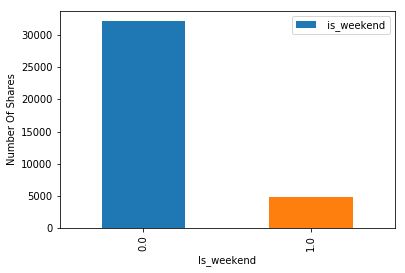

In [128]:
data[' is_weekend'].value_counts().plot.bar()
plt.legend()
plt.xlabel('Is_weekend')
plt.ylabel('Number Of Shares')

In [129]:
# Below plot bar shows artciles shared via entertainment channel

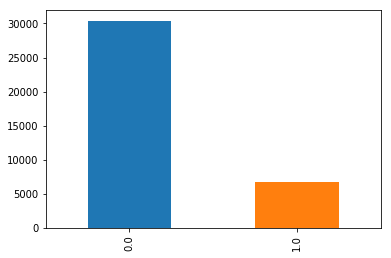

In [130]:
data[' data_channel_is_entertainment'].value_counts().plot.bar()

In [131]:
# Below bar plot shows average token length - It shows average token length of article is in between 3 and 6

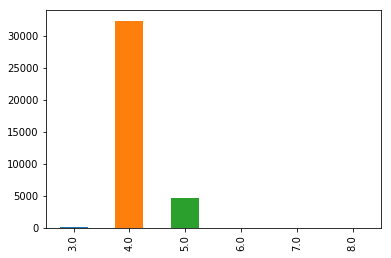

In [132]:
floored_data = np.floor(data[' average_token_length'])
floored_data.value_counts().sort_index().plot.bar()

In [133]:
# Line chart representing the same

Text(0,0.5,'Total Number Of Articles')

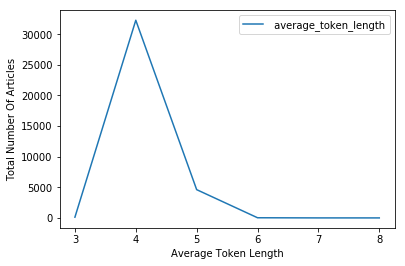

In [134]:
floored_data.value_counts().sort_index().plot.line()
plt.legend()
plt.xlabel('Average Token Length')
plt.ylabel('Total Number Of Articles')

In [135]:
# Below Histogram shows Number of Keywords in the article and we can see maximum number of keywords in the article are 7

Text(0.5,0,'Number Of Keywords')

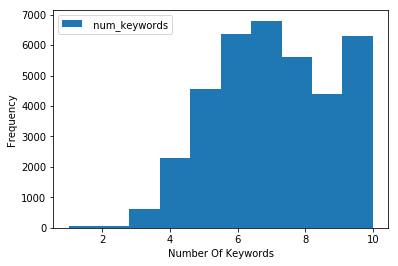

In [136]:
data[' num_keywords'].plot.hist()
plt.legend()
plt.xlabel('Number Of Keywords')

In [137]:
# Target variable --> shares - mean, median and mode

In [138]:
data[' shares'].mean()

3372.6037827482933

In [139]:
data[' shares'].median()

1400.0

In [140]:
data[' shares'].mode()

0    1100
dtype: int64

In [141]:
# In order to perform logistic regression, divided target variable --> shares into binary value using its median

In [142]:
data['NumberOfShares'].head()

0    0
1    0
2    1
3    0
4    0
Name: NumberOfShares, dtype: int64

In [143]:
# Below histogram shows that data is divided into two equal halves using median value

Text(0.5,0,'Number Of Shares')

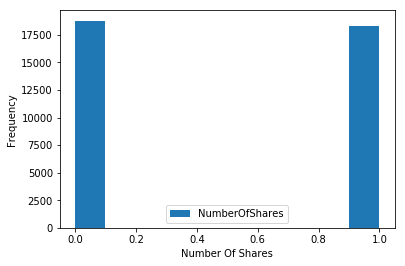

In [144]:
data['NumberOfShares'].plot.hist()
plt.legend()
plt.xlabel('Number Of Shares')

In [145]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,NumberOfShares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [146]:
df1 = data.iloc[:,1:30]

In [147]:
df2 = data.iloc[:,31:37]

In [148]:
df3 = data.iloc[:, 38:60]

In [149]:
frames = [df1, df2, df3]

In [150]:
result = pd.concat(frames, sort = False)

In [151]:
target = data[' shares']

In [152]:
data_days = data[[' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',  ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday']]

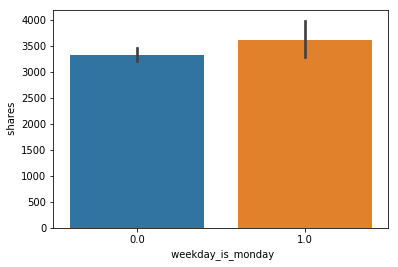

In [153]:
sns.barplot(x =data[' weekday_is_monday'] , y = target, data = data)

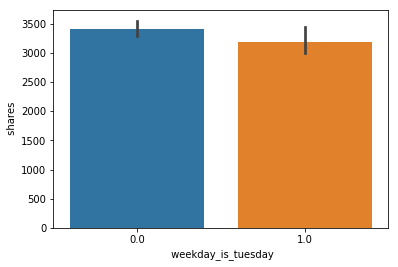

In [154]:
sns.barplot(x =data[' weekday_is_tuesday'] , y = target, data = data)

In [155]:
data_days.head()

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
# Heatmap

In [157]:
data.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,NumberOfShares
timedelta,1.000000,-0.240854,-0.090943,0.122526,-0.120410,0.097864,-0.022287,0.046513,-0.030009,0.001864,...,0.026276,0.038817,0.106743,-0.049276,-0.011436,0.042692,0.016606,0.003520,0.016541,0.053387
n_tokens_title,-0.240854,1.000000,0.026762,-0.027596,0.034973,-0.018379,-0.049719,-0.010440,-0.006947,0.054486,...,-0.004880,-0.034642,-0.045672,0.005222,0.075844,0.000578,-0.146122,0.039164,0.005776,-0.043707
n_tokens_content,-0.090943,0.026762,1.000000,-0.750940,0.628391,-0.599148,0.396485,0.282158,0.349653,0.099444,...,0.369504,0.002772,-0.390831,0.324098,0.010202,0.029742,0.000861,0.019162,0.005577,0.044757
n_unique_tokens,0.122526,-0.027596,-0.750940,1.000000,-0.806154,0.882436,-0.303409,-0.213114,-0.337897,0.020810,...,-0.319268,-0.079072,0.289100,-0.348543,0.019291,-0.029301,-0.014353,0.001614,0.011349,-0.043684
n_non_stop_words,-0.120410,0.034973,0.628391,-0.806154,1.000000,-0.647886,0.338472,0.187691,0.239533,0.078108,...,0.361630,0.039474,-0.340866,0.401331,-0.021847,0.016625,0.033407,-0.003494,-0.016305,0.007918
n_non_stop_unique_tokens,0.097864,-0.018379,-0.599148,0.882436,-0.647886,1.000000,-0.364127,-0.218152,-0.478241,-0.000629,...,-0.237834,-0.048763,0.192884,-0.223953,-0.013052,-0.042473,0.004782,-0.027644,-0.006521,-0.061156
num_hrefs,-0.022287,-0.049719,0.396485,-0.303409,0.338472,-0.364127,1.000000,0.379394,0.346491,0.111945,...,0.232686,-0.071824,-0.210308,0.113599,0.050070,0.043908,0.005330,0.062035,0.049886,0.094271
num_self_hrefs,0.046513,-0.010440,0.282158,-0.213114,0.187691,-0.218152,0.379394,1.000000,0.243728,0.074616,...,0.129915,0.010545,-0.072243,0.081066,-0.007450,0.029656,0.006756,-0.003866,0.000911,0.036966
num_imgs,-0.030009,-0.006947,0.349653,-0.337897,0.239533,-0.478241,0.346491,0.243728,1.000000,-0.068207,...,0.176932,-0.055451,-0.131027,0.061401,0.059954,0.046389,-0.015526,0.064366,0.040381,0.067689
num_videos,0.001864,0.054486,0.099444,0.020810,0.078108,-0.000629,0.111945,0.074616,-0.068207,1.000000,...,0.137491,-0.116888,-0.139744,0.038926,0.062719,0.022459,-0.025089,0.056754,0.024442,0.009092


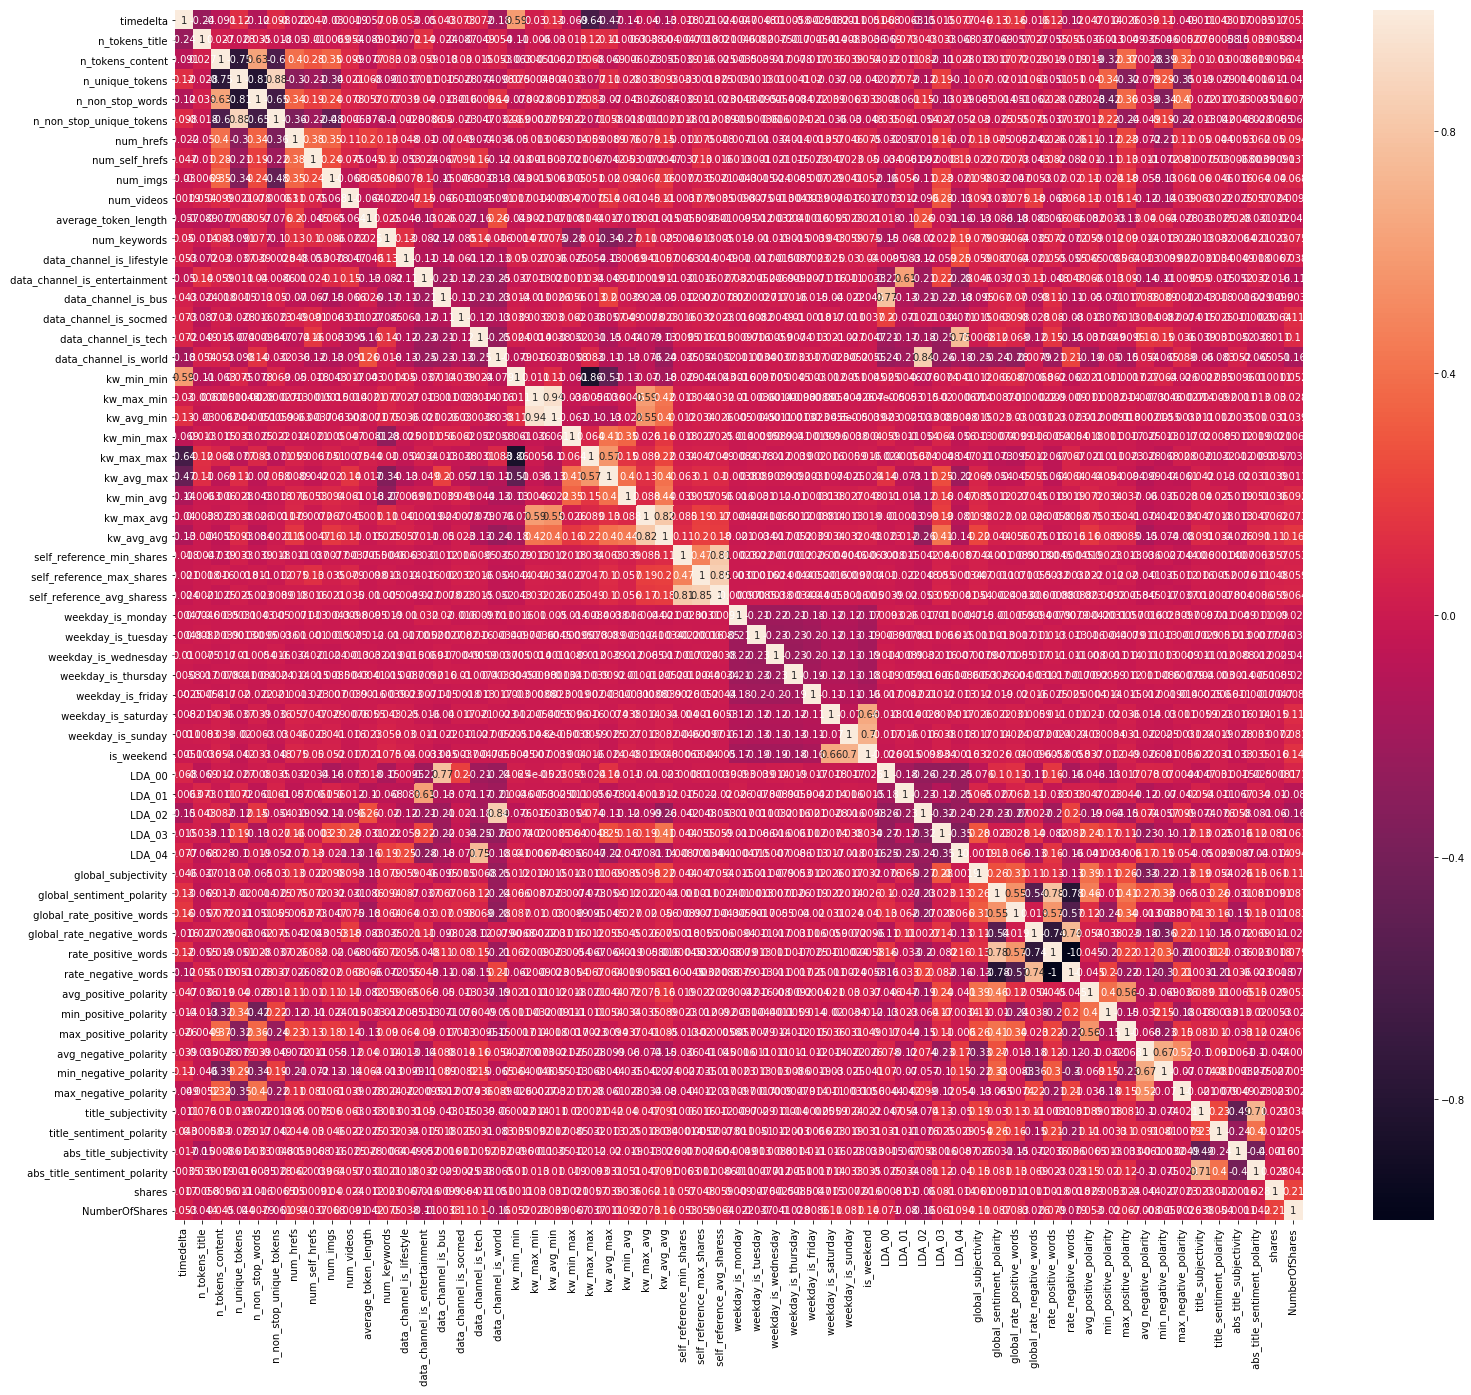

In [158]:
a4_dims = (25.27, 22.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(data.corr(), annot=True)

In [159]:
# Data Corelation

In [160]:
data.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,NumberOfShares
timedelta,1.000000,-0.240854,-0.090943,0.122526,-0.120410,0.097864,-0.022287,0.046513,-0.030009,0.001864,...,0.026276,0.038817,0.106743,-0.049276,-0.011436,0.042692,0.016606,0.003520,0.016541,0.053387
n_tokens_title,-0.240854,1.000000,0.026762,-0.027596,0.034973,-0.018379,-0.049719,-0.010440,-0.006947,0.054486,...,-0.004880,-0.034642,-0.045672,0.005222,0.075844,0.000578,-0.146122,0.039164,0.005776,-0.043707
n_tokens_content,-0.090943,0.026762,1.000000,-0.750940,0.628391,-0.599148,0.396485,0.282158,0.349653,0.099444,...,0.369504,0.002772,-0.390831,0.324098,0.010202,0.029742,0.000861,0.019162,0.005577,0.044757
n_unique_tokens,0.122526,-0.027596,-0.750940,1.000000,-0.806154,0.882436,-0.303409,-0.213114,-0.337897,0.020810,...,-0.319268,-0.079072,0.289100,-0.348543,0.019291,-0.029301,-0.014353,0.001614,0.011349,-0.043684
n_non_stop_words,-0.120410,0.034973,0.628391,-0.806154,1.000000,-0.647886,0.338472,0.187691,0.239533,0.078108,...,0.361630,0.039474,-0.340866,0.401331,-0.021847,0.016625,0.033407,-0.003494,-0.016305,0.007918
n_non_stop_unique_tokens,0.097864,-0.018379,-0.599148,0.882436,-0.647886,1.000000,-0.364127,-0.218152,-0.478241,-0.000629,...,-0.237834,-0.048763,0.192884,-0.223953,-0.013052,-0.042473,0.004782,-0.027644,-0.006521,-0.061156
num_hrefs,-0.022287,-0.049719,0.396485,-0.303409,0.338472,-0.364127,1.000000,0.379394,0.346491,0.111945,...,0.232686,-0.071824,-0.210308,0.113599,0.050070,0.043908,0.005330,0.062035,0.049886,0.094271
num_self_hrefs,0.046513,-0.010440,0.282158,-0.213114,0.187691,-0.218152,0.379394,1.000000,0.243728,0.074616,...,0.129915,0.010545,-0.072243,0.081066,-0.007450,0.029656,0.006756,-0.003866,0.000911,0.036966
num_imgs,-0.030009,-0.006947,0.349653,-0.337897,0.239533,-0.478241,0.346491,0.243728,1.000000,-0.068207,...,0.176932,-0.055451,-0.131027,0.061401,0.059954,0.046389,-0.015526,0.064366,0.040381,0.067689
num_videos,0.001864,0.054486,0.099444,0.020810,0.078108,-0.000629,0.111945,0.074616,-0.068207,1.000000,...,0.137491,-0.116888,-0.139744,0.038926,0.062719,0.022459,-0.025089,0.056754,0.024442,0.009092


In [161]:
# Outliers

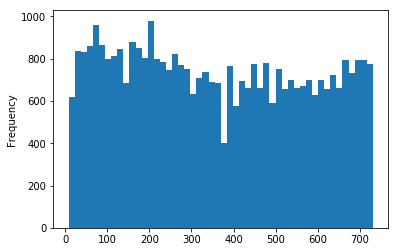

In [162]:
data[' timedelta'].plot.hist(bins=50)

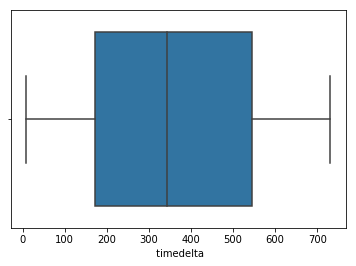

In [163]:
sns.boxplot(x = ' timedelta', data=data)

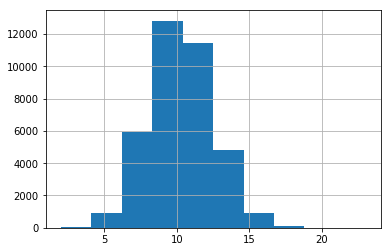

In [164]:
data[' n_tokens_title'].hist()

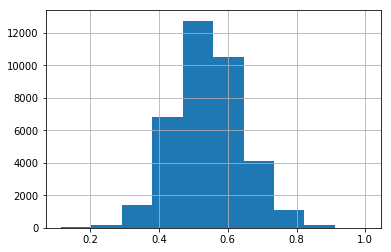

In [165]:
data[' n_unique_tokens'].hist()

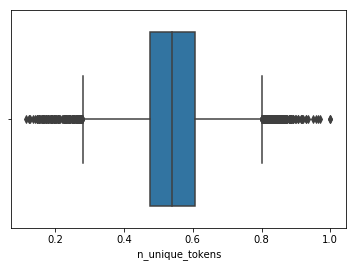

In [166]:
sns.boxplot(x = ' n_unique_tokens', data=data)

In [167]:
# Outliers present in n_unique_tokens attribute

In [168]:
# Data Distribution

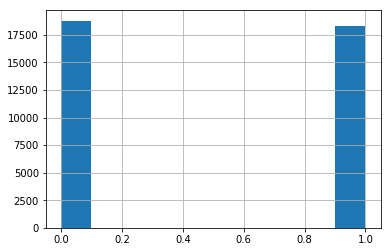

In [169]:
data['NumberOfShares'].hist()

In [170]:
# Distribution of shares as per weekdays

In [171]:
# Normal distribution for shares

In [172]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,NumberOfShares
count,37063.000000,37063.000000,37063.000000,37063.000000,3.706300e+04,37063.000000,37063.000000,37063.000000,37063.000000,37063.000000,...,37063.000000,37063.000000,37063.000000,37063.000000,37063.000000,37063.000000,37063.000000,37063.000000,37063.000000,37063.000000
mean,357.856137,10.387934,577.579257,0.542433,1.000000e+00,0.690346,11.404743,3.421957,4.655344,1.285946,...,0.784346,-0.277384,-0.557993,-0.114845,0.281360,0.069994,0.342910,0.155399,3372.603783,0.493187
std,212.560421,2.109019,470.727108,0.099722,3.566582e-09,0.098966,11.461332,3.920022,8.389060,4.227374,...,0.209653,0.111733,0.264646,0.094173,0.324388,0.265225,0.188260,0.226041,11730.064497,0.499960
min,8.000000,2.000000,24.000000,0.114964,9.999999e-01,0.119134,0.000000,0.000000,0.000000,0.000000,...,0.033333,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
25%,171.000000,9.000000,272.000000,0.475160,1.000000e+00,0.630769,5.000000,1.000000,1.000000,0.000000,...,0.600000,-0.334411,-0.750000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000,0.000000
50%,344.000000,10.000000,438.000000,0.539352,1.000000e+00,0.691450,8.000000,3.000000,1.000000,0.000000,...,0.800000,-0.262500,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000,0.000000
75%,545.000000,12.000000,745.000000,0.605691,1.000000e+00,0.752825,14.000000,4.000000,4.000000,1.000000,...,1.000000,-0.200000,-0.400000,-0.050000,0.500000,0.136364,0.500000,0.250000,2800.000000,1.000000
max,731.000000,23.000000,8474.000000,1.000000,1.000000e+00,1.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,-0.012500,-0.012500,-0.008333,1.000000,1.000000,0.500000,1.000000,843300.000000,1.000000


In [173]:
# Normal Distribution of Target Variable --> Shares

In [174]:
from scipy.stats import norm

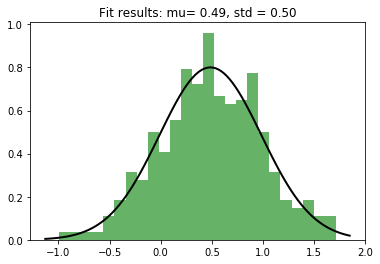

In [175]:
dataset = norm.rvs(0.49,0.49,size=500)
mu, std = norm.fit(dataset)
plt.hist(dataset, bins=25, density = True, alpha=0.6, color = 'g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu= %.2f, std = %.2f" % (mu,std)
plt.title(title)
plt.show()

In [176]:
#lmplot

In [177]:
ent = data[' data_channel_is_entertainment'].sample(100)
weekend = data[' is_weekend'].sample(100)

In [178]:
# Data Sampling

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X = data.drop([' shares', 'NumberOfShares', 'url'], axis=1)

In [181]:
y = data['NumberOfShares']

In [182]:
y_linear = data[' shares']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [186]:
predictions = logmodel.predict(X_test)

In [221]:
from sklearn.metrics import classification_report

In [188]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.60      0.66      0.63      6237
          1       0.61      0.55      0.57      5994

avg / total       0.60      0.60      0.60     12231



In [222]:
from sklearn.metrics import accuracy_score

In [190]:
print(accuracy_score(y_test, predictions))

0.6039571580410432


In [191]:
# Using Logistic Model Accuracy is 60%

## Logistic Regression Using IS_Weekend Only

In [192]:
data_weekday = data.iloc[:,38:39]

In [193]:
X_train, X_test, y_train, y_test = train_test_split(data_weekday, y, test_size=0.33, random_state=42)

In [194]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [195]:
predict = logmodel.predict(X_test)

In [196]:
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

          0       0.54      0.91      0.68      6237
          1       0.66      0.18      0.29      5994

avg / total       0.60      0.55      0.48     12231



In [197]:
print(confusion_matrix(y_test,predict))

NameError: name 'confusion_matrix' is not defined

In [ ]:
print(accuracy_score(y_test,predict))

In [ ]:
# Accuracy score using only is_weekday is 55%

## Logistic Regression Using Weekdays

In [ ]:
data_weekdays = data.iloc[:,31:37]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_weekdays, y, test_size=0.30, random_state=42)

In [ ]:
logmodel.fit(X_train, y_train)

In [ ]:
y_predict = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
print(confusion_matrix(y_test, y_predict))

In [ ]:
print(accuracy_score(y_test, y_predict))

In [ ]:
# Accuracy score using weekdays is 55%

## Data Cleanup

In [ ]:
data.shape

In [ ]:
# Removing outliers based on n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens

In [ ]:
data = data[data[' n_unique_tokens'] <= 1] 
data = data[data[' n_non_stop_words'] <= 1]
data = data[data[' n_non_stop_unique_tokens'] <= 1]

In [ ]:
# Remove rate_positive_words and rate_negative_words which are equal to zero

In [ ]:
data = data[data[' rate_positive_words'] + data[' rate_negative_words'] != 0]

In [ ]:
# Remove average token length encoded as zero

In [ ]:
data = data[data[' average_token_length'] != 0]

In [ ]:
# Remove other redundant columns

In [198]:
data_week = data.iloc[:, 31:37]

In [199]:
data_week.head()

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [200]:
data1 = data.drop(data.iloc[:, 31:37], axis=1, inplace=True)

In [201]:
data.shape

(37063, 56)

In [202]:
# Resampling dataset

In [203]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positiv

In [210]:
X_top = data[[' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity']]

In [211]:
y_top = data['NumberOfShares']

In [213]:
X_top.shape

(37063, 53)

In [ ]:
#data.NumberOfShares

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
logmodel.fit(X_train, y_train)

In [ ]:
y_predict = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
print(confusion_matrix(y_test, y_predict))

In [ ]:
print(accuracy_score(y_test, y_predict))

In [ ]:
# Accuracy of logistic regression model after cleaning up data is 60%

## *Logistic Regression - Top 30 predictors*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
importance = rfc.feature_importances_

In [ ]:
sorted_importances = np.argsort(importance)

In [ ]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, sorted_importances[f], importance[sorted_importances[f]]))

In [ ]:
from pylab import rcParams
rcParams['figure.figsize']=15,16
#plt.barh(range([X_rfc.shape[1]), importance[sorted_importances], align='center')
plt.barh(range(X.shape[1]), importance[sorted_importances], color="g", align="center")
# Customize the plot
plt.yticks(range(X.shape[1]), X.columns[sorted_importances], fontsize=13)
plt.xlabel("Relative Importance")
plt.ylim([-1, X.shape[1]])
plt.title("Feature Importance")
plt.show()

In [ ]:
X.iloc[:30,:].columns[sorted_importances][::-1]

In [229]:
top_predictors = data[[' kw_max_avg', ' LDA_02', ' kw_avg_avg', ' self_reference_min_shares',
       ' timedelta', ' n_non_stop_unique_tokens', ' LDA_04', ' LDA_01',
       ' global_subjectivity', ' average_token_length', ' LDA_00',
       ' kw_avg_min', ' n_unique_tokens', ' kw_min_avg', ' n_tokens_content',
       ' kw_avg_max', ' global_sentiment_polarity',
       ' self_reference_max_shares', ' LDA_03', ' global_rate_positive_words',
       ' avg_positive_polarity', ' self_reference_avg_sharess',
       ' avg_negative_polarity', ' kw_max_min', ' global_rate_negative_words',
       ' rate_positive_words', ' num_hrefs', ' rate_negative_words',
       ' n_tokens_title', ' kw_min_max']]

In [230]:
y = data['NumberOfShares']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(top_predictors, y, test_size=0.33, random_state=42)

In [ ]:
logmodel.fit(X_train, y_train)

In [ ]:
y_predict = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
print(confusion_matrix(y_test, y_predict))

In [ ]:
print(accuracy_score(y_test, y_predict))

In [ ]:
# Accuracy of logistic regresion model is improved using top predictors to 61%

## Regularization and Cross Validation

In [ ]:
# Rigid Regularization and Cross Validation

In [ ]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_cv\n')
alpha = np.linspace(.07,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)  
    # computing the RMSE on training data
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    err = y_pred-y_test    
    # Dot product of error vector with itself gives us the sum of squared errors
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(y_pred))

    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_cv))

In [ ]:
# Rigid Regression RMSE is 0.4786 and Cross Validation RMSE is 0.6303

In [ ]:
# Lasso Regularization

In [ ]:
print('alpha\t RMSE_train\t RMSE_cv\n')
alpha = np.linspace(.01,30,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    lasso = Lasso(fit_intercept=True, alpha=a)  
    # computing the RMSE on training data
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    err = y_pred-y_test    
    # Dot product of error vector with itself gives us the sum of squared errors
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(y_pred))

    # computing RMSE using 5-fold cross validation
    kf = KFold(len(X), n_folds=5)
    xval_err = 0
    for train, test in kf:
        lasso.fit(X_train, y_train)
        y_pred = lasso.predict(X_test)
        err = y_pred - y_test
        xval_err += np.dot(err,err)
    rmse_cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_cv))

In [ ]:
# Using Lasso Regularization, RMSE is 0.4907 and Cross Validation is 0.6303

### Generalized Linear Model

In [ ]:
from sklearn.preprocessing import StandardScaler
from pyglmnet import GLM

In [ ]:
glm_model = GLM(distr='binomial')

In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
glm_model.fit(scaler.transform(X_train), y_train)

In [ ]:
#yhat_test = glm.predict(scaler.transform(X_test))

In [ ]:
#deviance = glm.score(X_test.values, y_test.values)

In [ ]:
# Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)

In [ ]:
#split data into train and test sets
clus_train, clus_test = train_test_split(X, test_size=0.3, random_state=101)

In [ ]:
#k-means cluster analysis for 1-9 clusters
from scipy.spatial.distance import cdist
clusters = range(1,10)
meandist = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(clus_train)
    cluassign = model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))/clus_train.shape[0])

In [ ]:
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')

In [ ]:
kmeans.fit(X)

In [ ]:
y_kmeans = kmeans.predict(X)

In [ ]:
kmeans.cluster_centers_

In [223]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(data['NumberOfShares'], kmeans.labels_))
print(classification_report(data['NumberOfShares'], kmeans.labels_))

In [ ]:
print(accuracy_score(data['NumberOfShares'], kmeans.labels_))

In [ ]:
# Accuracy using K-means clustering is 48%

In [ ]:
# KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

In [ ]:
print(accuracy_score(y_test, pred))

In [ ]:
# Accuracy using KNN is 54%

In [ ]:
# K = 2

In [ ]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

In [ ]:
# With K= 2, Accuracy score is still 54%

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test, pred))

In [ ]:
# With K = 5, Accuracy score is 56%

In [ ]:
#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_linear, test_size=0.30, random_state=101)

In [ ]:
results = lm.fit(X_train, y_train)

In [ ]:
linear_pred_y = lm.predict(X_test)

In [ ]:
print(lm.intercept_)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

In [ ]:
prediction = lm.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
# Model Evaluation 
print('MAE:', metrics.mean_absolute_error(y_test, linear_pred_y))
print('MSE:', metrics.mean_squared_error(y_test, linear_pred_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, linear_pred_y)))

In [ ]:
print (results.intercept_, results.coef_)

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

In [ ]:
# For above, we conclude that linear regression accuracy is 12%

In [ ]:
## QQ plot

In [ ]:
data.describe()

In [ ]:
import scipy.stats as stats
import pylab 
measurements = np.random.normal(0.493187, 0.499960, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [ ]:
# As we can see from QQ plot - data is normally distributed

In [ ]:
# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#logmodel1 = LogisticRegression()
#logmodel1.fit(X_train,y_train)

In [ ]:
#predictions = logmodel1.predict(X_test)

In [ ]:
#from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#print(classification_report(y_test,predictions))

In [ ]:
#print(confusion_matrix(y_test,predictions))

In [ ]:
#print(accuracy_score(y_test,predictions))

In [ ]:
# Using logistic regression, accuracy is 60%

In [ ]:
# KFold Validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=3, shuffle=False, random_state=None)

In [ ]:
from sklearn.cross_validation import KFold

In [ ]:
kf = KFold(len(X), n_folds=5)

In [ ]:
#for train,test in kf:
#    print (train)
#    print (test)

In [ ]:
#scores = []
#for train, test in kf:
#    logmodel.fit(X_train, y_train)
#    scores.append(np.sqrt(metrics.mean_squared_error(y_test, logmodel.predict(X_test))))
#scores

In [ ]:
#np.mean(scores)

In [ ]:
#np.median(scores)

In [ ]:
#np.std(scores)

In [ ]:
#def show_stats(m, ncv, cv):
#  print('Method: %s' %m)
#  print('RMSE on no CV training: %.3f' %ncv)
#  print('RMSE on 5-fold CV: %.3f' %cv)

In [ ]:
#show_stats('Simple Linear Regression',rmse ,np.mean(scores))

In [ ]:
# Regularization

In [ ]:
# Rigid Regression or Regularization

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
print('Ridge Regression')
print('alpha\t RMSE_train\t')
alpha = np.linspace(.5,20,50)
t_rmse = np.array([])
#cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)  
    # computing the RMSE on training data
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    err = y_pred-y_test    
    # Dot product of error vector with itself gives us the sum of squared errors
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(y_pred))
    
    t_rmse = np.append(t_rmse, [rmse_train])
   # cv_rmse = np.append(cv_rmse, [rmse_cv])
    print('{:.3f}\t {:.4f}\t'.format(a,rmse_train))

In [ ]:
# In case of Rigid Regression, RMSE is 12119

In [ ]:
# lASSO Regression

In [ ]:
print('alpha\t RMSE_train\t RMSE_cv\n')
alpha = np.linspace(.3,50,50)
t_rmse = np.array([])
#cv_rmse = np.array([])

for a in alpha:
    lasso = Lasso(fit_intercept=True, alpha=a)  
    # computing the RMSE on training data
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    err = y_pred-y_test    
    # Dot product of error vector with itself gives us the sum of squared errors
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(y_pred))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    #cv_rmse = np.append(cv_rmse, [rmse_cv])
    print('{:.3f}\t {:.4f}\t'.format(a,rmse_train))

In [ ]:
# In case of Lasso Regression, RMSE is 12120

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
X_rfc = data.iloc[:,1:60]
Y_rfc = data.iloc[:, -1]

In [ ]:
rfc.fit(X_rfc,Y_rfc)

In [ ]:
data_rfc = [' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', 'NumberOfShares' ]

In [ ]:
importance = rfc.feature_importances_

In [ ]:
sorted_importances = np.argsort(importance)

In [ ]:
print("Feature ranking:")
for f in range(X_rfc.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, sorted_importances[f], importance[sorted_importances[f]]))

In [ ]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 100), rfc.feature_importances_), data_rfc), reverse=True))

In [ ]:
std = np.std([rfc.feature_importances_],axis=0)

In [ ]:
#sorted_importances = np.broadcast_to(sorted_importances, sorted_importances.shape)

In [ ]:
# Insert padding

In [ ]:
padding = np.arange(len(data_rfc)-1) + 0.5

In [ ]:
# Plot the data

In [ ]:
from pylab import rcParams
rcParams['figure.figsize']=15,16
#plt.barh(range([X_rfc.shape[1]), importance[sorted_importances], align='center')
plt.barh(range(X_rfc.shape[1]), importance[sorted_importances], color="g", align="center", yerr=std[sorted_importances])
# Customize the plot
plt.yticks(range(X_rfc.shape[1]), X_rfc.columns[sorted_importances], fontsize=13)
plt.xlabel("Relative Importance")
plt.ylim([-1, X_rfc.shape[1]])
plt.title("Feature Importance")
plt.show()

In [ ]:
# Outliers

In [ ]:
a4_dims = (10.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
df = pd.DataFrame(data = data.iloc[:,1:5])
sns.boxplot(x="variable", y = "value", data=pd.melt(df))
plt.show()

In [ ]:
data.columns

In [ ]:
data.boxplot(column=[' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens'])

In [ ]:
data.boxplot(column = [' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs'])

In [ ]:
df = pd.DataFrame(data.iloc[:,1:])

In [ ]:
df.head()

In [ ]:
df_melt = df.melt(id_vars = 'NumberOfShares', value_vars = [' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity'],
                  var_name = 'columns')

In [ ]:
a = sns.factorplot(data = df_melt,size=10,
                   x = 'value',
                   y = 'columns',
                   kind = 'box', # type of plot
                   #row = 'columns',
                   row_order = [' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity' # custom order of boxplots
                               ]).set_titles('{row_name}') # remove 'column = ' part of title

plt.show()

In [ ]:
# kw_avg_min, kw_avg_max, kw_max_max, kw_avg_max, kw_min_max, kw_avg_avg, self_reference_min_shares, self_reference_max_shares
# self_reference_avg_shares, weekday_is_monday, 

In [ ]:
a = sns.factorplot(data = df_melt,size=6,
                   x = 'value',
                   #y = 'columns',
                   kind = 'box', # type of plot
                   row = 'columns',
                   row_order = [' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity' # custom order of boxplots
                               ]).set_titles('{row_name}') # remove 'column = ' part of title

plt.show()

In [ ]:
# Histogram for all the columns in the dataset

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F646E5FAC8>],
      dtype=object)

<Figure size 8x1 with 0 Axes>

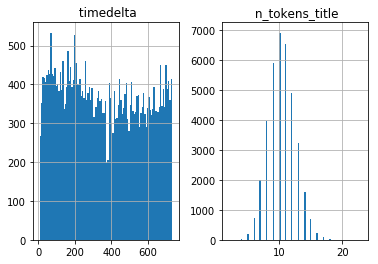

In [97]:
from matplotlib.pyplot import figure
dpi=8
figure(num=None, figsize=(1, 1/dpi), dpi=8, facecolor='w', edgecolor='k')
timedelta = pd.DataFrame(data[' timedelta'])
n_tokens_title = pd.DataFrame(data[' n_tokens_title'])
fig, axes = plt.subplots(1, 2)
timedelta.hist( bins=100, ax=axes[0], figsize=1)
n_tokens_title.hist(bins=100, ax=axes[1], figsize=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F646F10668>]],
      dtype=object)

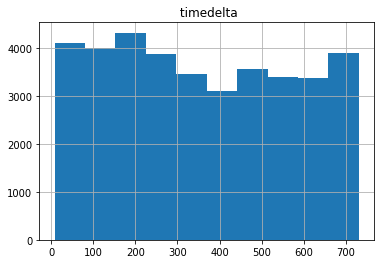

In [98]:
data.hist(column = [' timedelta'])

In [ ]:
# SVM Top 30 Prdictors

In [231]:
X_train, X_test, y_train, y_test = train_test_split(top_predictors, y, test_size=0.33, random_state=42)

In [233]:
y_train.shape

(24832,)

In [234]:
from sklearn.svm import SVC

In [235]:
svc_model = SVC()

In [236]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
y_predict = svc_model.predict(X_test)

In [238]:
print(confusion_matrix(y_test, y_predict))

[[6237    0]
 [5994    0]]


In [239]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.51      1.00      0.68      6237
          1       0.00      0.00      0.00      5994

avg / total       0.26      0.51      0.34     12231



C:\Users\chitr\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [240]:
print(accuracy_score(y_test, y_predict))

0.5099337748344371


In [241]:
# Hyperparameter tunning using Grid Search

In [242]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [244]:
from sklearn.grid_search import GridSearchCV
model_svm = GridSearchCV(svc_model, tuned_parameters,cv=10,scoring='accuracy')

In [ ]:
#model_svm.fit(X_train, y_train)
#print(model_svm.best_score_)